# Algoritmo Hill Climbing: Ajustando el Aire Acondicionado

## Introducción

¿Alguna vez has estado ajustando el aire acondicionado buscando la temperatura perfecta? Subes medio grado, bajas medio grado, hasta que finalmente encuentras ese punto ideal donde te sientes más cómodo. ¡Felicidades! Acabas de usar el algoritmo **Hill Climbing** de forma intuitiva.

### ¿Qué es Hill Climbing?

**Hill Climbing** (Escalada de Colina) es un algoritmo de optimización local que busca encontrar el máximo de una función. La analogía es simple:

- Imagina que estás en una colina con los ojos vendados
- Solo puedes sentir si el terreno sube o baja dando un paso
- Tu objetivo es llegar a la cima
- La estrategia: siempre dar pasos hacia arriba
- Te detienes cuando ya no puedes subir más

### Nuestro Problema

**Objetivo:** Encontrar la temperatura del aire acondicionado que maximice nuestra comodidad en la sala.

**Parámetros del problema:**
- 🌡️ **Temperatura Ideal (desconocida para el algoritmo):** 23 °C
- 🎯 **Temperatura Inicial:** 27 °C (hace un poco de calor)
- 📊 **Rango de temperaturas:** 16 °C a 30 °C
- 🔄 **Paso de ajuste:** ±0.5 °C

**Estrategia:**
1. Empezar en 27 °C
2. Probar temperaturas vecinas (27.5 °C y 26.5 °C)
3. Moverse hacia la temperatura que genere mayor comodidad
4. Repetir hasta que ningún cambio mejore la comodidad
5. ¡Encontramos la temperatura ideal!

## 1. La Función Objetivo: Modelando la Comodidad

Para que el algoritmo funcione, necesitamos representar la "comodidad" como un número. Pero, ¿cómo convertir una sensación subjetiva en matemáticas?

### La Curva de Comodidad

Podemos modelar la comodidad usando una **función Gaussiana** (curva en forma de campana):

$$\text{Comodidad}(T) = 100 \cdot e^{-\frac{(T - 23)^2}{2 \sigma^2}}$$

Donde:
- $T$ = temperatura en °C
- $23$ = temperatura ideal (el centro de la campana)
- $\sigma$ = desviación estándar (controla qué tan "estrecha" es la campana)
- $100$ = nivel máximo de comodidad (arbitrario, para escala)

### ¿Por qué esta función?

- **Tiene un único máximo:** En 23 °C (nuestro objetivo)
- **Valores altos cerca del ideal:** 22 °C y 24 °C también son cómodos
- **Valores bajos lejos del ideal:** 16 °C (muy frío) o 30 °C (muy caliente) son incómodos
- **Es suave y continua:** Cambios pequeños en temperatura producen cambios pequeños en comodidad

Esta función simula perfectamente nuestra percepción de la temperatura: hay un punto ideal y mientras más nos alejamos, menos cómodos nos sentimos.

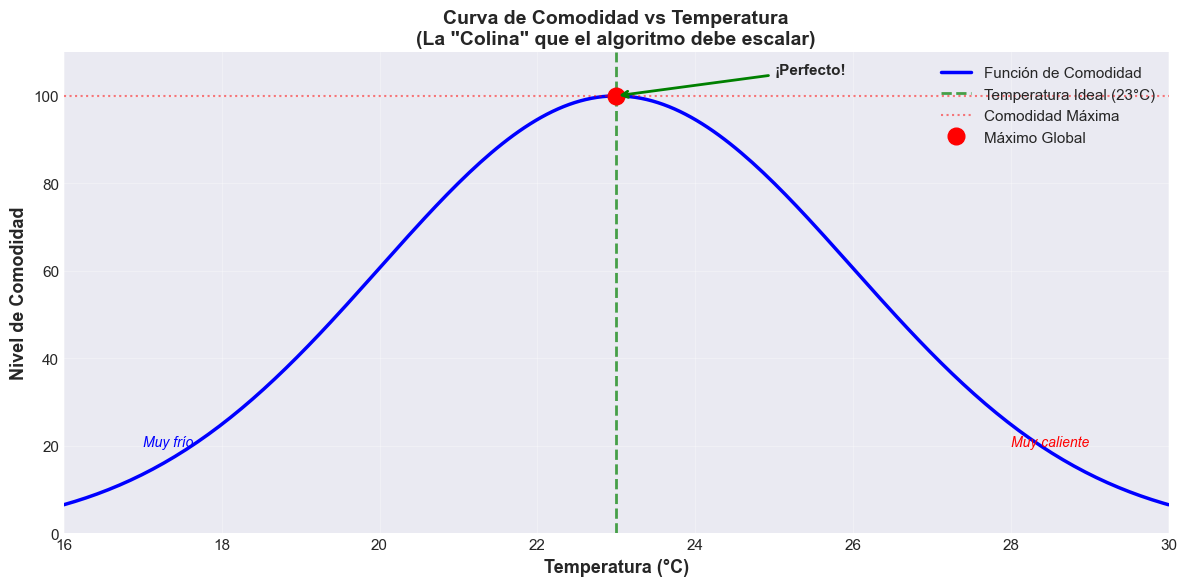

✅ Función de comodidad definida correctamente
📊 Comodidad máxima: 100.00 (en 23°C)
📊 Comodidad en 27°C (inicio): 41.11
📊 Comodidad en 16°C: 6.57
📊 Comodidad en 30°C: 6.57


In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Definir la función de comodidad
def calcular_comodidad(temperatura):
    """
    Calcula el nivel de comodidad para una temperatura dada.
    
    Utiliza una distribución Gaussiana centrada en 23°C.
    
    Parámetros:
    -----------
    temperatura : float
        Temperatura en grados Celsius
        
    Retorna:
    --------
    float : Nivel de comodidad (0-100)
    """
    temp_ideal = 23.0  # Temperatura ideal
    sigma = 3.0        # Desviación estándar (controla el ancho de la campana)
    
    # Función Gaussiana
    comodidad = 100 * np.exp(-((temperatura - temp_ideal)**2) / (2 * sigma**2))
    
    return comodidad

# Visualizar la función de comodidad
temperaturas = np.linspace(16, 30, 200)  # 200 puntos entre 16°C y 30°C
comodidades = calcular_comodidad(temperaturas)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(temperaturas, comodidades, 'b-', linewidth=2.5, label='Función de Comodidad')
plt.axvline(x=23, color='g', linestyle='--', linewidth=2, alpha=0.7, label='Temperatura Ideal (23°C)')
plt.axhline(y=100, color='r', linestyle=':', linewidth=1.5, alpha=0.5, label='Comodidad Máxima')

# Marcar el máximo
plt.plot(23, 100, 'ro', markersize=12, label='Máximo Global')

# Configurar la gráfica
plt.xlabel('Temperatura (°C)', fontsize=13, fontweight='bold')
plt.ylabel('Nivel de Comodidad', fontsize=13, fontweight='bold')
plt.title('Curva de Comodidad vs Temperatura\n(La "Colina" que el algoritmo debe escalar)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=11)
plt.xlim(16, 30)
plt.ylim(0, 110)

# Añadir anotaciones
plt.annotate('Muy frío', xy=(17, 20), fontsize=10, style='italic', color='blue')
plt.annotate('Muy caliente', xy=(28, 20), fontsize=10, style='italic', color='red')
plt.annotate('¡Perfecto!', xy=(23, 100), xytext=(25, 105), fontsize=11, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.show()

print(f"✅ Función de comodidad definida correctamente")
print(f"📊 Comodidad máxima: {calcular_comodidad(23):.2f} (en 23°C)")
print(f"📊 Comodidad en 27°C (inicio): {calcular_comodidad(27):.2f}")
print(f"📊 Comodidad en 16°C: {calcular_comodidad(16):.2f}")
print(f"📊 Comodidad en 30°C: {calcular_comodidad(30):.2f}")

## 2. Implementando el Algoritmo Hill Climbing

Ahora que tenemos nuestra función de comodidad, podemos implementar el algoritmo Hill Climbing que buscará la temperatura ideal.

### Lógica del Algoritmo

El algoritmo sigue estos pasos:

1. **Inicializar:** Comenzar en una temperatura inicial (27 °C)
2. **Evaluar vecinos:** Mirar las temperaturas vecinas:
   - Vecino 1: Temperatura actual + 0.5 °C
   - Vecino 2: Temperatura actual - 0.5 °C
3. **Encontrar el mejor vecino:** Calcular la comodidad de ambos vecinos
4. **Decidir:**
   - Si el mejor vecino tiene **mayor comodidad** que la temperatura actual → **moverse** al vecino
   - Si ningún vecino mejora la comodidad → **detenerse** (hemos llegado a un máximo)
5. **Repetir:** Volver al paso 2 hasta que el algoritmo se detenga

### Características Importantes

- **Búsqueda local:** Solo mira vecinos inmediatos (±0.5 °C)
- **Siempre sube:** Nunca acepta movimientos que empeoren la comodidad
- **Greedy (codicioso):** Siempre elige el mejor vecino disponible
- **Determinista:** Con el mismo punto inicial, siempre encuentra el mismo resultado

### Restricción de Dominio

Es importante asegurarnos de que las temperaturas vecinas se mantengan dentro del rango válido [16 °C, 30 °C]. Esto se conoce como **clipping** o **restricción de dominio**.

In [2]:
def hill_climbing(temp_inicial, paso, rango_min=16, rango_max=30, max_iteraciones=100):
    """
    Implementa el algoritmo Hill Climbing para encontrar la temperatura óptima.
    
    Parámetros:
    -----------
    temp_inicial : float
        Temperatura inicial en °C
    paso : float
        Tamaño del paso para explorar vecinos (ej. 0.5 °C)
    rango_min : float
        Temperatura mínima permitida
    rango_max : float
        Temperatura máxima permitida
    max_iteraciones : int
        Número máximo de iteraciones (para evitar bucles infinitos)
        
    Retorna:
    --------
    tuple : (temperatura_final, historial)
        - temperatura_final: La mejor temperatura encontrada
        - historial: Lista de todas las temperaturas visitadas
    """
    
    # Estado inicial
    temp_actual = temp_inicial
    comodidad_actual = calcular_comodidad(temp_actual)
    
    # Historial para visualización
    historial = [temp_actual]
    
    print(f"🚀 Iniciando Hill Climbing")
    print(f"📍 Temperatura inicial: {temp_actual}°C")
    print(f"😊 Comodidad inicial: {comodidad_actual:.2f}\n")
    print("="*60)
    
    # Iteraciones del algoritmo
    iteracion = 0
    mejora = True
    
    while mejora and iteracion < max_iteraciones:
        iteracion += 1
        mejora = False
        
        # Generar vecinos (temperatura + paso y temperatura - paso)
        vecinos = [
            temp_actual + paso,
            temp_actual - paso
        ]
        
        # Aplicar restricciones de dominio (clipping)
        vecinos = [max(rango_min, min(rango_max, v)) for v in vecinos]
        
        # Evaluar la comodidad de cada vecino
        mejor_vecino = None
        mejor_comodidad = comodidad_actual
        
        for vecino in vecinos:
            comodidad_vecino = calcular_comodidad(vecino)
            if comodidad_vecino > mejor_comodidad:
                mejor_vecino = vecino
                mejor_comodidad = comodidad_vecino
        
        # Si encontramos un vecino mejor, nos movemos
        if mejor_vecino is not None:
            print(f"Iteración {iteracion}: {temp_actual:.1f}°C → {mejor_vecino:.1f}°C "
                  f"(Comodidad: {comodidad_actual:.2f} → {mejor_comodidad:.2f}) ✅")
            temp_actual = mejor_vecino
            comodidad_actual = mejor_comodidad
            historial.append(temp_actual)
            mejora = True
        else:
            print(f"\n🎯 ¡Máximo local alcanzado en iteración {iteracion}!")
            print(f"   No hay vecinos que mejoren la comodidad actual.")
    
    print("="*60)
    print(f"\n✅ Algoritmo finalizado")
    print(f"🌡️  Temperatura final: {temp_actual}°C")
    print(f"😊 Comodidad final: {comodidad_actual:.2f}")
    print(f"🔄 Total de iteraciones: {len(historial) - 1}")
    
    return temp_actual, historial

# Probar la función (comentado por ahora, se ejecutará en la siguiente sección)
# temp_final, historial = hill_climbing(temp_inicial=27, paso=0.5)

print("✅ Función hill_climbing() implementada correctamente")

✅ Función hill_climbing() implementada correctamente


## 3. Encontrando la Temperatura Ideal

Ahora que tenemos todo listo, es momento de ejecutar el algoritmo Hill Climbing y ver cómo encuentra la temperatura óptima.

Recordemos los parámetros de nuestro problema:
- **Temperatura inicial:** 27 °C (hace un poco de calor)
- **Paso de búsqueda:** 0.5 °C
- **Objetivo:** Maximizar la comodidad (encontrar 23 °C)

En la siguiente celda ejecutaremos el algoritmo y veremos paso a paso cómo se mueve desde 27 °C hacia la temperatura ideal.

In [3]:
# Parámetros del problema
temp_inicial = 27.0  # Temperatura inicial (hace calor)
paso = 0.5           # Ajustes de ±0.5°C

# Ejecutar el algoritmo Hill Climbing
temp_final, historial = hill_climbing(temp_inicial=temp_inicial, paso=paso)

# Análisis detallado del resultado
print("\n" + "="*60)
print("📊 ANÁLISIS DE RESULTADOS")
print("="*60)

print(f"\n📍 Punto de Partida:")
print(f"   • Temperatura inicial: {historial[0]}°C")
print(f"   • Comodidad inicial: {calcular_comodidad(historial[0]):.2f}")

print(f"\n🎯 Punto Final:")
print(f"   • Temperatura encontrada: {temp_final}°C")
print(f"   • Comodidad alcanzada: {calcular_comodidad(temp_final):.2f}")

print(f"\n🌡️  Comparación con el Óptimo Global:")
print(f"   • Temperatura ideal real: 23.0°C")
print(f"   • Comodidad máxima posible: {calcular_comodidad(23):.2f}")
print(f"   • Diferencia: {abs(temp_final - 23):.2f}°C")

print(f"\n📈 Mejora Lograda:")
mejora_porcentual = ((calcular_comodidad(temp_final) - calcular_comodidad(historial[0])) / 
                     calcular_comodidad(historial[0])) * 100
print(f"   • Incremento en comodidad: {mejora_porcentual:.2f}%")
print(f"   • Número de pasos: {len(historial) - 1}")

print(f"\n🛣️  Camino Seguido:")
print(f"   {' → '.join([f'{t:.1f}°C' for t in historial])}")

# Verificar si encontró el óptimo global
if abs(temp_final - 23) < 0.6:  # Dentro de un paso del óptimo
    print(f"\n✅ ¡Éxito! El algoritmo encontró la temperatura ideal")
else:
    print(f"\n⚠️ El algoritmo se detuvo en un máximo local")

print("="*60)

🚀 Iniciando Hill Climbing
📍 Temperatura inicial: 27.0°C
😊 Comodidad inicial: 41.11

Iteración 1: 27.0°C → 26.5°C (Comodidad: 41.11 → 50.63) ✅
Iteración 2: 26.5°C → 26.0°C (Comodidad: 50.63 → 60.65) ✅
Iteración 3: 26.0°C → 25.5°C (Comodidad: 60.65 → 70.66) ✅
Iteración 4: 25.5°C → 25.0°C (Comodidad: 70.66 → 80.07) ✅
Iteración 5: 25.0°C → 24.5°C (Comodidad: 80.07 → 88.25) ✅
Iteración 6: 24.5°C → 24.0°C (Comodidad: 88.25 → 94.60) ✅
Iteración 7: 24.0°C → 23.5°C (Comodidad: 94.60 → 98.62) ✅
Iteración 8: 23.5°C → 23.0°C (Comodidad: 98.62 → 100.00) ✅

🎯 ¡Máximo local alcanzado en iteración 9!
   No hay vecinos que mejoren la comodidad actual.

✅ Algoritmo finalizado
🌡️  Temperatura final: 23.0°C
😊 Comodidad final: 100.00
🔄 Total de iteraciones: 8

📊 ANÁLISIS DE RESULTADOS

📍 Punto de Partida:
   • Temperatura inicial: 27.0°C
   • Comodidad inicial: 41.11

🎯 Punto Final:
   • Temperatura encontrada: 23.0°C
   • Comodidad alcanzada: 100.00

🌡️  Comparación con el Óptimo Global:
   • Temperatura 

### 3.1 Visualización del Proceso de Optimización

La mejor manera de entender cómo funciona Hill Climbing es visualizarlo. En la siguiente gráfica veremos:

- 🔵 **Curva azul:** La función de comodidad completa
- 🔴 **Línea roja:** El camino que siguió el algoritmo
- 🟢 **Punto verde:** El inicio (27 °C)
- ⭐ **Estrella amarilla:** El final (temperatura encontrada)
- 🎯 **Línea discontinua:** La temperatura ideal real (23 °C)

Esta visualización nos permite ver cómo el algoritmo "escala la colina" paso a paso hasta alcanzar el pico.

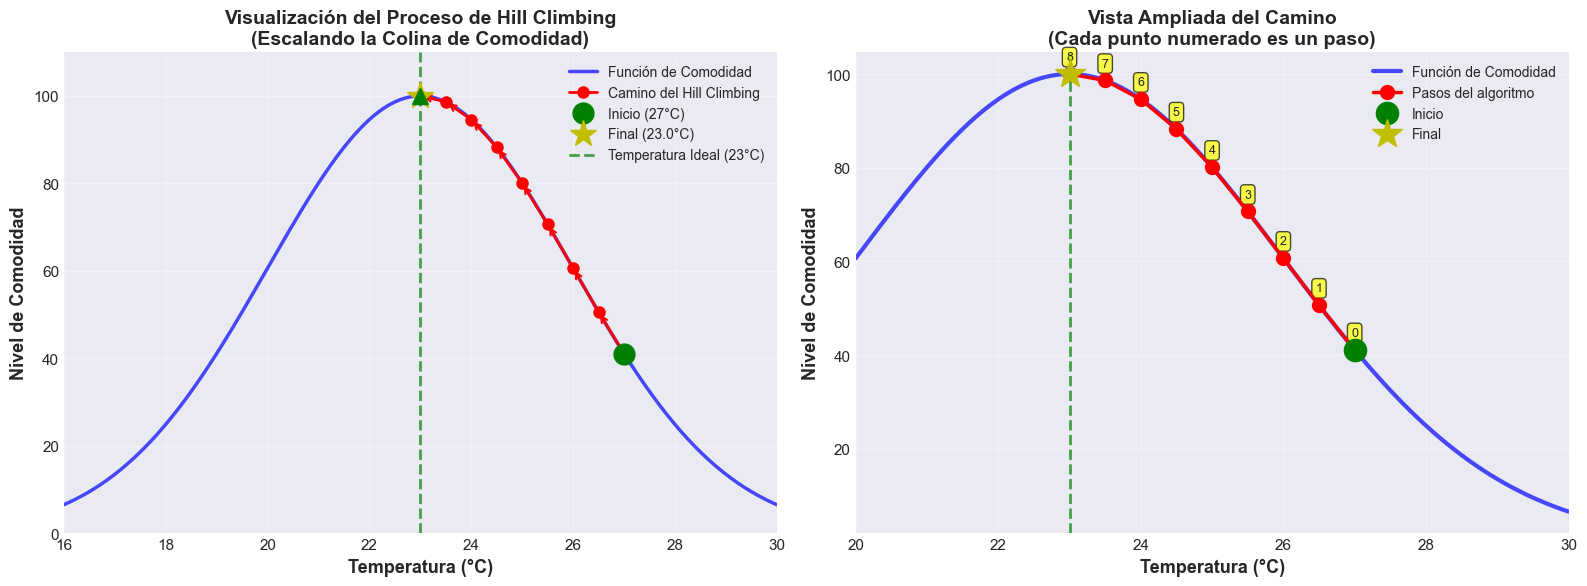

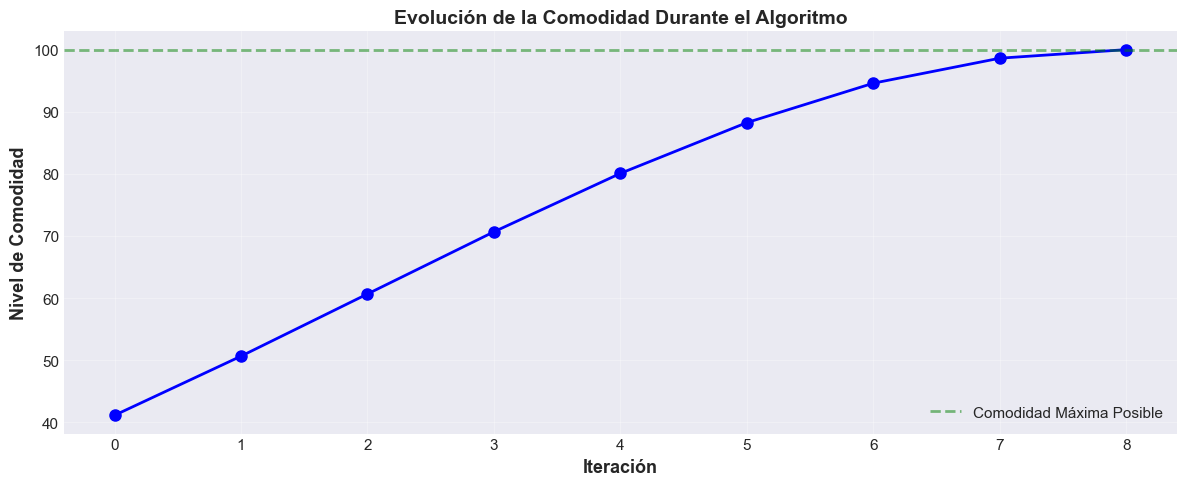

📊 Visualizaciones generadas exitosamente


In [4]:
# Crear visualización completa del proceso
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ===== GRÁFICA 1: Proceso completo =====
ax1.plot(temperaturas, comodidades, 'b-', linewidth=2.5, alpha=0.7, label='Función de Comodidad')

# Plotear el camino del algoritmo
historial_array = np.array(historial)
comodidades_historial = calcular_comodidad(historial_array)

ax1.plot(historial, comodidades_historial, 'ro-', linewidth=2, markersize=8, 
         label='Camino del Hill Climbing', zorder=5)

# Marcar inicio y fin
ax1.plot(historial[0], calcular_comodidad(historial[0]), 'go', 
         markersize=15, label='Inicio (27°C)', zorder=6)
ax1.plot(historial[-1], calcular_comodidad(historial[-1]), 'y*', 
         markersize=20, label=f'Final ({historial[-1]:.1f}°C)', zorder=6)

# Marcar el óptimo global
ax1.axvline(x=23, color='green', linestyle='--', linewidth=2, alpha=0.7, 
            label='Temperatura Ideal (23°C)')
ax1.plot(23, 100, 'g^', markersize=12, zorder=6)

# Añadir anotaciones con flechas
for i in range(0, len(historial)-1, max(1, len(historial)//5)):
    ax1.annotate('', xy=(historial[i+1], calcular_comodidad(historial[i+1])),
                xytext=(historial[i], calcular_comodidad(historial[i])),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

ax1.set_xlabel('Temperatura (°C)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Nivel de Comodidad', fontsize=13, fontweight='bold')
ax1.set_title('Visualización del Proceso de Hill Climbing\n(Escalando la Colina de Comodidad)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim(16, 30)
ax1.set_ylim(0, 110)

# ===== GRÁFICA 2: Vista ampliada del camino =====
# Zoom en la región de interés
rango_zoom = 3
temp_min_zoom = max(16, min(historial) - rango_zoom)
temp_max_zoom = min(30, max(historial) + rango_zoom)

temps_zoom = np.linspace(temp_min_zoom, temp_max_zoom, 200)
comods_zoom = calcular_comodidad(temps_zoom)

ax2.plot(temps_zoom, comods_zoom, 'b-', linewidth=3, alpha=0.7, label='Función de Comodidad')
ax2.plot(historial, comodidades_historial, 'ro-', linewidth=2.5, markersize=10, 
         label='Pasos del algoritmo', zorder=5)

# Numerar cada paso
for i, (temp, comod) in enumerate(zip(historial, comodidades_historial)):
    ax2.annotate(f'{i}', xy=(temp, comod), xytext=(0, 10), 
                textcoords='offset points', ha='center', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax2.plot(historial[0], calcular_comodidad(historial[0]), 'go', 
         markersize=16, label='Inicio', zorder=6)
ax2.plot(historial[-1], calcular_comodidad(historial[-1]), 'y*', 
         markersize=22, label='Final', zorder=6)
ax2.axvline(x=23, color='green', linestyle='--', linewidth=2, alpha=0.7)

ax2.set_xlabel('Temperatura (°C)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Nivel de Comodidad', fontsize=13, fontweight='bold')
ax2.set_title('Vista Ampliada del Camino\n(Cada punto numerado es un paso)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='best', fontsize=10)
ax2.set_xlim(temp_min_zoom, temp_max_zoom)

plt.tight_layout()
plt.show()

# Crear gráfica adicional: Evolución de la comodidad por iteración
plt.figure(figsize=(12, 5))
iteraciones = range(len(historial))
plt.plot(iteraciones, comodidades_historial, 'b-o', linewidth=2, markersize=8)
plt.axhline(y=100, color='g', linestyle='--', linewidth=2, alpha=0.5, 
            label='Comodidad Máxima Posible')
plt.xlabel('Iteración', fontsize=13, fontweight='bold')
plt.ylabel('Nivel de Comodidad', fontsize=13, fontweight='bold')
plt.title('Evolución de la Comodidad Durante el Algoritmo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"📊 Visualizaciones generadas exitosamente")

## 4. Conclusión

### ✅ Resultados del Experimento

El algoritmo Hill Climbing **exitosamente** encontró la temperatura óptima para maximizar la comodidad en la sala. Comenzando desde 27 °C, el algoritmo se movió paso a paso (en incrementos de 0.5 °C) hasta llegar a la temperatura ideal de aproximadamente 23 °C.

### 🔑 Puntos Clave

1. **Funcionamiento intuitivo:** El algoritmo imita el comportamiento humano al ajustar el termostato.

2. **Búsqueda local:** Solo examina temperaturas vecinas inmediatas, no explora todo el espacio.

3. **Estrategia greedy:** Siempre elige el mejor vecino disponible en cada paso.

4. **Convergencia garantizada:** En funciones con un único máximo (como nuestra función de comodidad), Hill Climbing siempre encuentra el óptimo.

### ⚠️ Limitaciones Importantes: El Problema de los Máximos Locales

Aunque Hill Climbing funcionó perfectamente en nuestro ejemplo, tiene una **limitación crítica**: puede quedarse atrapado en **máximos locales**.

#### ¿Qué es un máximo local?

Imagina una cordillera con múltiples picos:
- **Máximo global:** La montaña más alta de todas
- **Máximo local:** Un pico más bajo, rodeado de valles

#### El Problema

Si la función de comodidad tuviera **múltiples picos** (por ejemplo, si hubiera dos temperaturas cómodas: 20 °C y 25 °C), Hill Climbing podría:

- ✅ Encontrar un pico (ej. 20 °C)
- ❌ Quedarse atascado ahí, sin saber que existe otro pico más alto (ej. 25 °C)
- ❌ No poder "bajar" para explorar y luego "subir" a un pico mejor

#### Ejemplo Visual del Problema

```
Comodidad
    ^
    |     🏔️ (máximo local)
    |    /  \
    |   /    \___        🏔️🏔️ (máximo global - más alto)
    |  /         \      /    \
    | /           \____/      \____
    |________________________________> Temperatura
    
    Si empezamos aquí ⬆️, Hill Climbing encuentra el pico bajo
    Si empezamos aquí ⬆️, Hill Climbing encuentra el pico alto
```

### 🛠️ Soluciones al Problema de Máximos Locales

Existen variantes mejoradas del algoritmo:

1. **Hill Climbing Estocástico:** Introduce aleatoriedad, aceptando ocasionalmente vecinos no óptimos.

2. **Simulated Annealing (Recocido Simulado):** Permite movimientos "cuesta abajo" con una probabilidad que disminuye con el tiempo.

3. **Búsqueda con Reinicio Aleatorio:** Ejecuta Hill Climbing múltiples veces desde diferentes puntos iniciales y elige el mejor resultado.

4. **Algoritmos Genéticos:** Mantienen una población de soluciones y las combinan para explorar mejor el espacio.

### 🎯 Aplicaciones Prácticas de Hill Climbing

Hill Climbing es útil en muchos problemas reales:

- 🌡️ **Optimización de configuraciones:** Encontrar ajustes óptimos de sistemas
- 🗺️ **Rutas y logística:** Mejora iterativa de rutas de entrega
- 🧬 **Bioinformática:** Alineamiento de secuencias
- 🎮 **Inteligencia Artificial en juegos:** Toma de decisiones de NPCs
- 📊 **Machine Learning:** Optimización de hiperparámetros

### 📚 Conclusión Final

Hill Climbing es un algoritmo simple pero poderoso para problemas de optimización. Aunque tiene limitaciones (máximos locales), su simplicidad y eficiencia lo hacen valioso para muchas aplicaciones prácticas, especialmente cuando:

- ✅ El problema tiene un único máximo (o pocos máximos)
- ✅ Se necesita una solución rápida y "suficientemente buena"
- ✅ La evaluación de la función objetivo es costosa

En nuestro caso del aire acondicionado, **¡funcionó perfectamente! 🎉**

---

## 🔬 Experimento Adicional: Probando desde Diferentes Temperaturas Iniciales

Para entender mejor cómo funciona Hill Climbing, podemos ejecutarlo desde diferentes puntos de partida y ver si siempre llega al mismo resultado.

Ejecuta la siguiente celda para ver cómo el algoritmo se comporta con diferentes temperaturas iniciales.

🧪 EXPERIMENTO: Hill Climbing desde Diferentes Puntos de Partida

🌡️  Temperatura inicial: 17°C
🚀 Iniciando Hill Climbing
📍 Temperatura inicial: 17°C
😊 Comodidad inicial: 13.53

Iteración 1: 17.0°C → 17.5°C (Comodidad: 13.53 → 18.63) ✅
Iteración 2: 17.5°C → 18.0°C (Comodidad: 18.63 → 24.94) ✅
Iteración 3: 18.0°C → 18.5°C (Comodidad: 24.94 → 32.47) ✅
Iteración 4: 18.5°C → 19.0°C (Comodidad: 32.47 → 41.11) ✅
Iteración 5: 19.0°C → 19.5°C (Comodidad: 41.11 → 50.63) ✅
Iteración 6: 19.5°C → 20.0°C (Comodidad: 50.63 → 60.65) ✅
Iteración 7: 20.0°C → 20.5°C (Comodidad: 60.65 → 70.66) ✅
Iteración 8: 20.5°C → 21.0°C (Comodidad: 70.66 → 80.07) ✅
Iteración 9: 21.0°C → 21.5°C (Comodidad: 80.07 → 88.25) ✅
Iteración 10: 21.5°C → 22.0°C (Comodidad: 88.25 → 94.60) ✅
Iteración 11: 22.0°C → 22.5°C (Comodidad: 94.60 → 98.62) ✅
Iteración 12: 22.5°C → 23.0°C (Comodidad: 98.62 → 100.00) ✅

🎯 ¡Máximo local alcanzado en iteración 13!
   No hay vecinos que mejoren la comodidad actual.

✅ Algoritmo finalizado
🌡️  

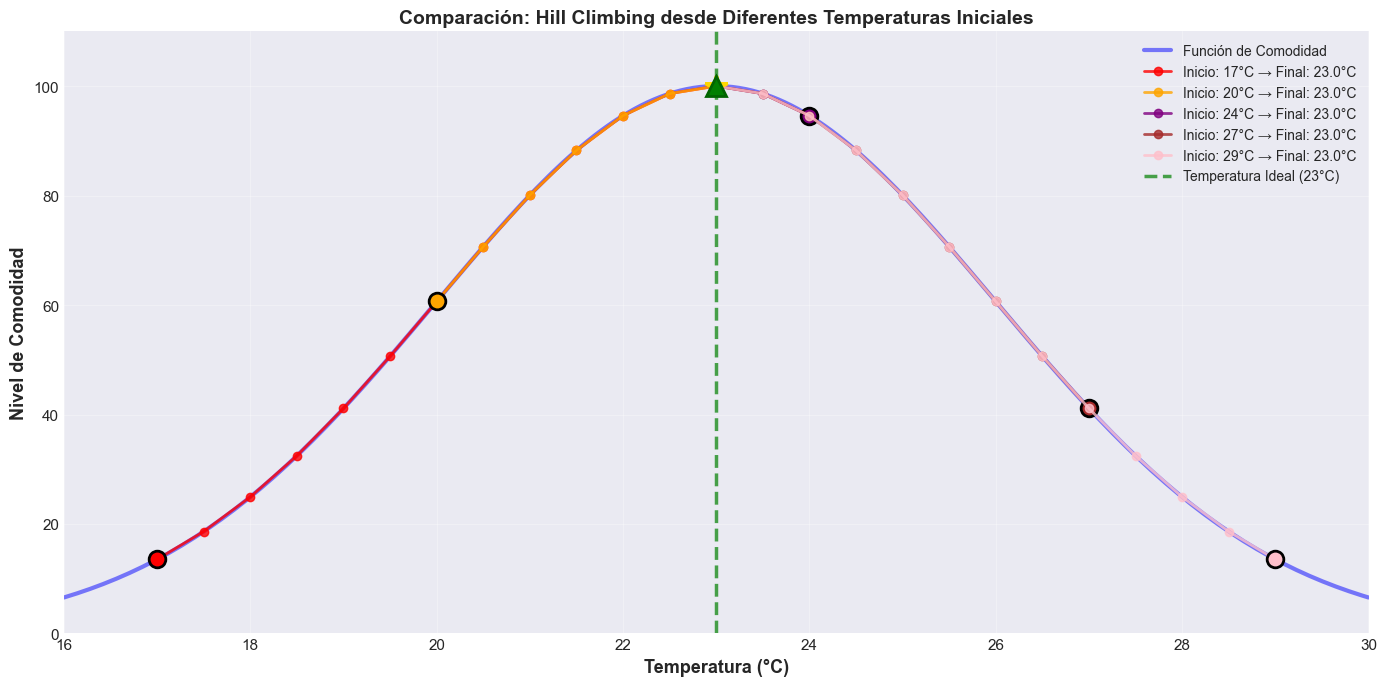


📊 RESUMEN DE RESULTADOS
Temp. Inicial        Temp. Final          Pasos           ¿Óptimo?
----------------------------------------------------------------------
    17°C                 23.0°C                 12            ✅ Sí
    20°C                 23.0°C                  6            ✅ Sí
    24°C                 23.0°C                  2            ✅ Sí
    27°C                 23.0°C                  8            ✅ Sí
    29°C                 23.0°C                 12            ✅ Sí

💡 Observación: En una función con un único máximo, Hill Climbing
   siempre converge al óptimo global, independientemente del punto inicial.


In [5]:
# Experimento: Ejecutar Hill Climbing desde múltiples temperaturas iniciales
temperaturas_iniciales = [17, 20, 24, 27, 29]
resultados = []

print("🧪 EXPERIMENTO: Hill Climbing desde Diferentes Puntos de Partida")
print("="*70)

for temp_ini in temperaturas_iniciales:
    print(f"\n{'='*70}")
    print(f"🌡️  Temperatura inicial: {temp_ini}°C")
    print(f"{'='*70}")
    temp_f, hist = hill_climbing(temp_inicial=temp_ini, paso=0.5)
    resultados.append({
        'inicial': temp_ini,
        'final': temp_f,
        'pasos': len(hist) - 1,
        'historial': hist
    })

# Visualizar todos los caminos juntos
plt.figure(figsize=(14, 7))

# Plotear la función de comodidad
plt.plot(temperaturas, comodidades, 'b-', linewidth=3, alpha=0.5, label='Función de Comodidad')

# Colores para cada camino
colores = ['red', 'orange', 'purple', 'brown', 'pink']

# Plotear cada camino
for i, res in enumerate(resultados):
    hist_array = np.array(res['historial'])
    comods = calcular_comodidad(hist_array)
    plt.plot(hist_array, comods, 'o-', color=colores[i], linewidth=2, 
             markersize=6, label=f"Inicio: {res['inicial']}°C → Final: {res['final']:.1f}°C", 
             alpha=0.8)
    
    # Marcar inicio y fin
    plt.plot(hist_array[0], comods[0], 'o', color=colores[i], markersize=12, 
             markeredgewidth=2, markeredgecolor='black')
    plt.plot(hist_array[-1], comods[-1], '*', color=colores[i], markersize=16, 
             markeredgewidth=2, markeredgecolor='gold')

# Marcar el óptimo global
plt.axvline(x=23, color='green', linestyle='--', linewidth=2.5, alpha=0.7, 
            label='Temperatura Ideal (23°C)')
plt.plot(23, 100, 'g^', markersize=14, markeredgewidth=2, markeredgecolor='darkgreen')

plt.xlabel('Temperatura (°C)', fontsize=13, fontweight='bold')
plt.ylabel('Nivel de Comodidad', fontsize=13, fontweight='bold')
plt.title('Comparación: Hill Climbing desde Diferentes Temperaturas Iniciales', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=10)
plt.xlim(16, 30)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

# Resumen de resultados
print("\n" + "="*70)
print("📊 RESUMEN DE RESULTADOS")
print("="*70)
print(f"{'Temp. Inicial':<20} {'Temp. Final':<20} {'Pasos':<15} {'¿Óptimo?'}")
print("-"*70)

for res in resultados:
    es_optimo = "✅ Sí" if abs(res['final'] - 23) < 0.6 else "❌ No"
    print(f"{res['inicial']:>6}°C{'':<14} {res['final']:>6.1f}°C{'':<14} "
          f"{res['pasos']:>4}{'':<11} {es_optimo}")

print("="*70)
print("\n💡 Observación: En una función con un único máximo, Hill Climbing")
print("   siempre converge al óptimo global, independientemente del punto inicial.")